In [1]:
# dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
# xception model
model = Xception(
    include_top=True,
    weights='imagenet')

In [3]:
# default image size
image_size = (299,299)

..\project3\data\1.jpg


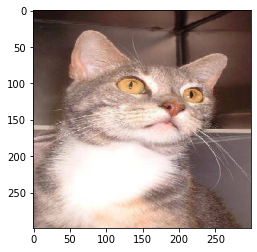

In [4]:
# load image and resize 
image_path = os.path.join("..", "project3", "data", "1.jpg")
# /Users/monicabustillos/Documents/project3/data
print(image_path)
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


Predicted: [('n02123045', 'tabby', 0.6031952), ('n02123159', 'tiger_cat', 0.14564598), ('n02124075', 'Egyptian_cat', 0.098369986)]


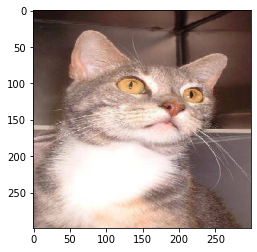

In [6]:
# predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    return  decode_predictions(predictions, top=3)[0]

In [8]:
image_path = os.path.join("..", "project3", "data", "2.jpg")

cur_preds = predict(image_path)
cur_preds

[('n06359193', 'web_site', 0.31165054),
 ('n02123045', 'tabby', 0.18851271),
 ('n02124075', 'Egyptian_cat', 0.085129246)]

In [9]:
# pred = decode_predictions(predictions, top=3)[0]
directory = "/Users/monicabustillos/Documents/project3/data"
prediction_list = []
for file in os.listdir(directory):
    if file.endswith(".jpg"):
        image_path = os.path.join("..", "project3", "data", file)
        variable = predict(image_path)
#         print(variable)
        for item in variable:
            prediction_list.append({
                'Image': file,
                'Prediction': item[1],
                'Probability': item[2],
            })

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/monicabustillos/Documents/project3/data'

In [ ]:
prediction_list

In [ ]:
df = pd.DataFrame.from_dict(prediction_list)
df.head()

In [ ]:
df['Breed Prediction'] = df['Prediction'].replace("_"," ")
df.head()

In [ ]:
df["Probability Percentage"] = round(df["Probability"]*100,2)
df.head(20)

In [ ]:
df.to_csv("ml_data.csv",index=True)